In [1]:

inputFile = "data/subdivision2.txt"
file = open(inputFile, "r")
input = file.readlines()
file.close()
# print(input)


In [2]:
import re
from DoublyConnectedEdgeList import Vertex, Face, HalfEdge

vertex = []
face = []
halfedge = []

def readVertex(line):
	idx = re.search('v(.+?) ', line).group(1)
	x = re.search(' \((.+?),', line).group(1)
	y = re.search(', (.+?)\)', line).group(1)
	es = re.search(' e(.+?),', line).group(1)
	ee = re.search('e\d,(.+?)\n', line).group(1)
	v = Vertex(idx, x, y)
	vertex.append(v)
	return v

def readFace(line):
	idx = re.search('f(\d) ', line).group(1)
	f = Face(idx)
	face.append(f)
	return f

def readHalfEdge(line):
	vsi = re.search('e(\d),\d v', line).group(1)
	vei = re.search('e\d,(\d) v', line).group(1)
	fi = re.search('f(\d) ', line).group(1)

	vs = vertex[int(vsi)-1]
	ve = vertex[int(vei)-1]
	f = face[int(fi)-1]
	e = HalfEdge(vs, ve, f)
	halfedge.append(e)
	return e

# find x,y cordinates of vertex for ploting
x_values = []
y_values = []

for line in input:
	c = line[0]
	if c == 'v':
		v = readVertex(line)
		x_values.append(float(v.x))
		y_values.append(float(v.y))
	elif c == 'f':
		f = readFace(line)
	elif c == 'e':
		e = readHalfEdge(line)
	pass

# the face outside bounding box
face_out = Face(str(len(face)))

# bounding vertice
min_x = min(x_values)
max_x = max(x_values)
min_y = min(y_values)
max_y = max(y_values)
offset_x = (max_x - min_x) * 0.2
offset_y = (max_y - min_y) * 0.2
topl = Vertex(len(vertex)+1, min_x-offset_x, max_y+offset_y)
topr = Vertex(len(vertex)+2, max_x+offset_x, max_y+offset_y)
botr = Vertex(len(vertex)+3, max_x+offset_x, min_y-offset_y)
botl = Vertex(len(vertex)+4, min_x-offset_x, min_y-offset_y)

# bounding edges
boundT = HalfEdge(topl, topr, face_out)
boundR = HalfEdge(topr, botr, face_out)
boundB = HalfEdge(botr, botl, face_out)
boundL = HalfEdge(botl, topl, face_out)

halfedge[len(halfedge):] = [boundT, boundR, boundB, boundL]


In [65]:
seg_edg = dict()	# dictionnary of line segments as key to corresponding value in list of halfedges

'''Append multiple values to a key in the given dictionary'''
def add_values_to_dict(target_dict, key, list_of_values):
	if key not in target_dict:
		target_dict[key] = list()
	target_dict[key].extend(list_of_values)
	return target_dict


segment = []
s_e_dict = dict()
for edge in halfedge:
	seg = edge.toLineSegment()
	seg_ = seg.__str__()
	edg_ = edge.__str__()
	segment.append(seg)
	s_e_dict = add_values_to_dict(s_e_dict, seg_, [edg_])

# print(s_e_dict)

# seen = set()
# result = []
# for item in segment:
# 	itm_str = item.__str__()
# 	if itm_str not in seen:
# 		seen.add(item)
# 		result.append(item)
# segment = result

i=0
j=0
seen = set()
result = []
for item in segment:
	if item not in seen:
		seen.add(item)
		i+=1
		result.append(item)
	j+=1
print (i, j)
segment = result

for s in result:
	print(s)

12 12
(0.0, 5.5) (2.0, 4.0)
(0.0, 5.5) (2.0, 4.0)
(0.0, 5.5) (2.2, 2.0)
(0.0, 5.5) (2.2, 2.0)
(2.0, 4.0) (2.2, 2.0)
(2.0, 4.0) (2.2, 2.0)
(1.0, 1.0) (2.2, 2.0)
(1.0, 1.0) (2.2, 2.0)
(-0.44000000000000006, 6.4) (2.64, 6.4)
(2.64, 0.09999999999999998) (2.64, 6.4)
(-0.44000000000000006, 0.09999999999999998) (2.64, 0.09999999999999998)
(-0.44000000000000006, 0.09999999999999998) (-0.44000000000000006, 6.4)


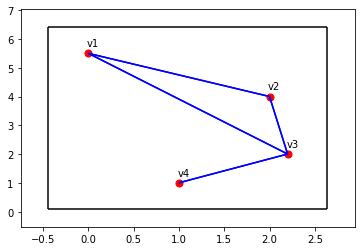

In [4]:
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.collections as mc
# from TrapezoidalMap import Point, LineSegment

segment_plot = []
for s in segment:
	stt = (s.plx, s.ply)
	end = (s.prx, s.pry)
	segment_plot.append([stt, end])

fig, ax = pl.subplots()

ax.add_collection(mc.LineCollection(segment_plot[:-4], colors=('blue')))
ax.add_collection(mc.LineCollection(segment_plot[-4:], colors=('black')))
ax.set_xlim(0, 10)

ax.autoscale()
ax.margins(0.1)

for v in vertex:
	plt.text(v.x-0.015, v.y+0.25, "v"+str(v.idx))

plt.scatter(x_values, y_values, color="red", s=50)
# plt.savefig('trapzodialMap.png', dpi=1000)
plt.show()

In [5]:
# Algorithm TRAPEZOIDALMAP(S)
# Input. A set S of n non-crossing line segments.
# Output. The trapezoidal map T(S) and a search structure D for T(S) in a bounding box.
# 1. Determine a bounding box R that contains all segments of S, and initialize the trapezoidal map structure T and search structure D for it.
# 2. Compute a random permutation s1,s2,...,sn of the elements of S.
# 3. for i ← 1 to n
# 4. 	do Find the set ∆0,∆1,...,∆k of trapezoids in T properly intersected by si.
# 5. 	Remove ∆0,∆1,...,∆k from T and replace them by the new trapezoids that appear because of the insertion of si.
# 6. 	Remove the leaves for ∆0,∆1,...,∆k from D, and create leaves for the new trapezoids. Link the new leaves to the existing inner nodes by adding some new inner nodes, as explained below.


In [6]:
# Algorithm FOLLOWSEGMENT(T,D,si)
# Input. A trapezoidal map T, a search structure D for T, and a new segment si.
# Output. The sequence ∆0,...,∆k of trapezoids intersected by si.
# 1. Let p and q be the left and right endpoint of si.
# 2. Search with p in the search structure D to find ∆0.
# 3. j ← 0;
# 4. while q lies to the right of rightp(∆j)
# 5. 	do if rightp(∆j) lies above si
# 6. 		then Let ∆j+1 be the lower right neighbor of ∆j.
# 7. 		else Let ∆j+1 be the upper right neighbor of ∆j.
# 8. 	j ← j +1
# 9. return ∆0,∆1,...,∆j


In [7]:
# Algorithm RANDOMPERMUTATION(A)
# Input. An array A[1···n].
# Output. The array A[1···n] with the same elements, but rearranged into a random permutation.
# 1. for k ← n downto 2
# 2. 	do rndindex ←RANDOM(k)
# 3. 	Exchange A[k] and A[rndindex].

def randomSegment():
	halfedge
	pass


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)

# drawing in circular layout
nx.draw_circular(g, with_labels = True)
plt.savefig("filename1.png")
# clearing the current plot
plt.clf()

# drawing in planar layout
nx.draw_planar(g, with_labels = True)
plt.savefig("filename2.png")
# clearing the current plot
plt.clf()

# drawing in random layout
nx.draw_random(g, with_labels = True)
plt.savefig("filename3.png")
# clearing the current plot
plt.clf()

# drawing in spectral layout
nx.draw_spectral(g, with_labels = True)
plt.savefig("filename4.png")
# clearing the current plot
plt.clf()

# drawing in spring layout
nx.draw_spring(g, with_labels = True)
plt.savefig("filename5.png")
# clearing the current plot
plt.clf()

# drawing in shell layout
nx.draw_shell(g, with_labels = True)
plt.savefig("filename6.png")
# clearing the current plot
plt.clf()

<Figure size 432x288 with 0 Axes>

/var/folders/b5/3_hxb4wx733_0kzsjsn17fcw0000gn/T/ipykernel_14236/4260796930.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


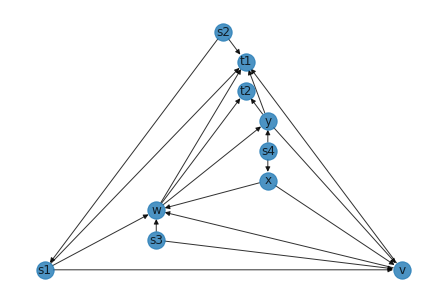

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
	's1': ['v', 't1','w'],
	's2': ['t1','s1'],
	's3': ['v','w'],
	's4': ['x','y'],
	'x': ['v','w'],
	'v': ['t1', 'w'],
	'w': ['y','t1','t2'],
	'y': ['v','t1','t2'],
	't1': [],
	't2': []
	}

def main(G):
	fig = plt.figure()
	fig.show()

	graph = nx.DiGraph()

	for v in G.keys():
		graph.add_node(v)

	for delta in G.items():
		for w in delta[1]:
			graph.add_edge(delta[0],w)

	#posit = nx.shell_layout(G) #ISN'T NEEDED ANYMORE

	nx.draw_planar(graph,with_labels = True, alpha=0.8) #NEW FUNCTION
	fig.canvas.draw()

main(graph)